# Import Library

In [ ]:
import kagglehub
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Data Downloading

In [ ]:
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")
print("Path to dataset files:", path)

# Data Loading

In [ ]:
base_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)
valid_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=32, class_mode='binary', target_size=(150, 150))
validation_generator = valid_datagen.flow_from_directory(
    valid_dir, batch_size=32, class_mode='binary', target_size=(150, 150))
test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=32, class_mode='binary', target_size=(150, 150), shuffle=False)

# VGG16 Model

Path to dataset files: /kaggle/input/140k-real-and-fake-faces
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 692s 218ms/step - accuracy: 0.6948 - loss: 0.6058 - val_accuracy: 0.7744 - val_loss: 0.4693
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 329s 105ms/step - accuracy: 0.7687 - loss: 0.4825 - val_accuracy: 0.8025 - val_loss: 0.4374
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 328s 105ms/step - accuracy: 0.7852 - loss: 0.4538 - val_accuracy: 0.8069 - val_loss: 0.4289
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 382s 122ms/step - accuracy: 0.7984 - loss: 0.4314 - val_accuracy: 0.8194 - val_loss: 0.3986
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 387s 105ms/step - accuracy: 0.8065 - loss: 0.4208 - val_accuracy: 0.8219 - val_loss: 0.3830
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 382s 122ms/step - accuracy: 0.8123 - loss: 0.4066 - val_accuracy: 0.8331 - val_loss: 0.3656
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 326s 104ms/step - accuracy: 0.8142 - loss: 0.3969 - val_accuracy: 0.8394 - val_loss: 0.3525
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 325s 104ms/step - ac

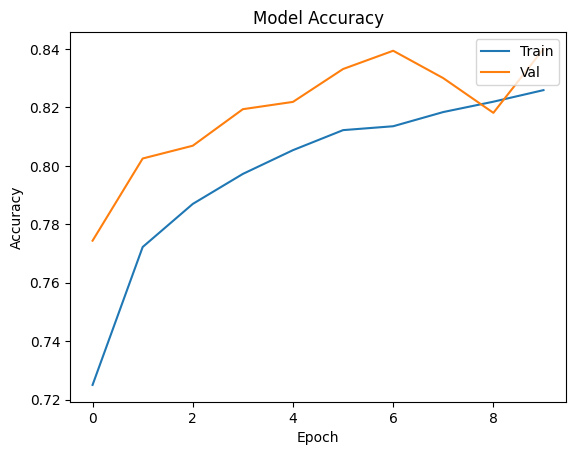

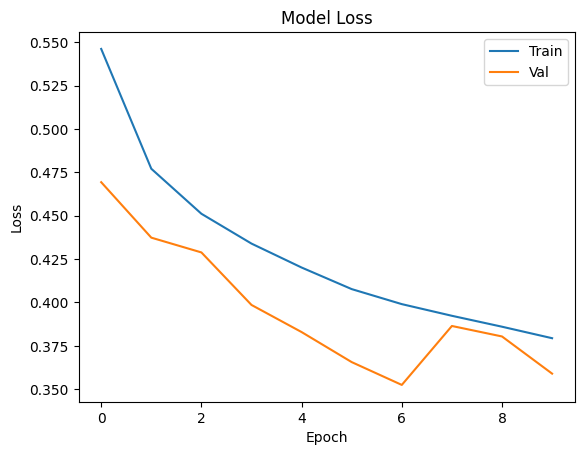

625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 220ms/step
Evaluation Metrics:
Accuracy : 0.8381
Precision: 0.8311
Recall   : 0.8486
F1-Score : 0.8398

Classification Report:
              precision    recall  f1-score   support

        fake       0.85      0.83      0.84     10000
        real       0.83      0.85      0.84     10000

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



In [1]:
base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    validation_steps=50,
    verbose=1
)

# Plot Results

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evalaution Metrics Results

In [ ]:
test_generator.reset()
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")